In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [7]:
df = pd.read_csv("honeyproduction.csv")
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [8]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [9]:
# Select the column year from dataframe
X = prod_per_year["year"] 

# Make a single column
X = X.values.reshape(-1, 1) 

# Select the column year from dataframe
y = prod_per_year["totalprod"] 

# Makes a single column (rotating from one long row to a single column)
y = y.values.reshape(-1, 1) 

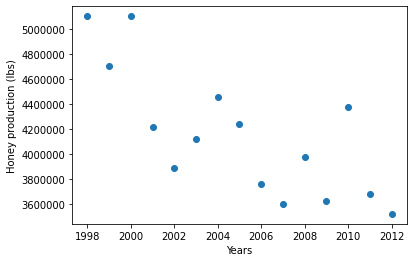

In [15]:
# Plot the data points we have
plt.scatter(X, y)
plt.ticklabel_format(style = 'plain') # Disable the scientific notation for the axis
plt.xlabel("Years")
plt.ylabel("Honey production (lbs)")
plt.show()

In [16]:
# Use linear regression and fit the linear model
regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

y_predict = regr.predict(X)

[[-88303.18915238]]
[1.81208083e+08]


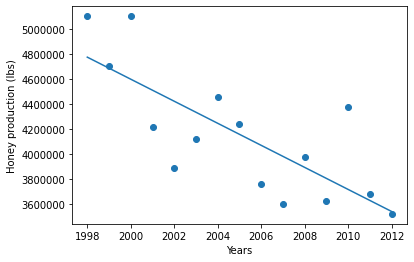

In [19]:
# Plot the line fit
plt.scatter(X, y)
plt.plot(X, y_predict, '-')
plt.ticklabel_format(style = 'plain') # Disable the scientific notation for the axis
plt.xlabel("Years")
plt.ylabel("Honey production (lbs)")
plt.show()

In [21]:
# Let's now predict the honey production from 2013 to 2050
nums = np.array(range(2013, 2050, 1))
X_future = nums.reshape(-1, 1)

future_predict = regr.predict(X_future)
# print(future_predict)

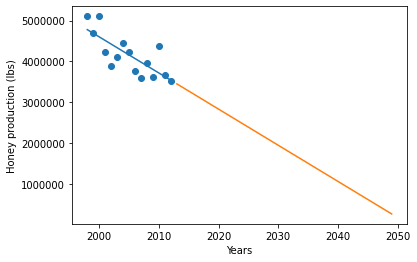

In [23]:
plt.scatter(X, y)
plt.plot(X, y_predict, '-')
plt.plot(X_future, future_predict, '-')
plt.ticklabel_format(style = 'plain') # Disable the scientific notation for the axis
plt.xlabel("Years")
plt.ylabel("Honey production (lbs)")
plt.show()